Problem 1  - Perform a classification task with knn from scratch

1.Load the dataset and perform EDA

In [21]:
import pandas as pd
import numpy as np
dataframe = pd.read_csv("/content/drive/MyDrive/Concept_and_technologies_of_AI/diabetes_.csv")
#shape
print(dataframe.shape)
#first 5 rows
print(dataframe.head())
#datset info
print(dataframe.info())
#statics of dataset
print(dataframe.describe())
#null values in dataset
print(dataframe.isnull().sum())


(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose             

2. Handling missing data

In [22]:
#there was no missing values found in the dataset according to the previous observation
missing_info = dataframe.isnull().sum() / len(dataframe) * 100
for col in dataframe.columns:
  if missing_info[col]>10:
    dataframe[col].fillna(dataframe[col].median())
  else:
    dataframe.dropna(subset=[col],inplace=True)
print("Data after processing:n", dataframe.head())

Data after processing:n    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


3.Feature Engineering

seperating data into test-train split

In [23]:
#seperating features X and target y
X = dataframe.drop(columns=["Outcome"]).values
y= dataframe["Outcome"].values #converting both X and y to np arrays
#test-train split
def train_test_split(X, y, test_size=0.3, random_seed=42):
 np.random.seed(random_seed)
 indices = np.arange(X.shape[0])
 np.random.shuffle(indices) # Shuffle the indices
 test_split_size = int(len(X) * test_size)
 test_indices = indices[:test_split_size]
 train_indices = indices[test_split_size:]
 X_train, X_test = X[train_indices], X[test_indices]
 y_train, y_test = y[train_indices], y[test_indices]
 return X_train, X_test, y_train, y_test
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


Implementing KNN

In [24]:
def euclidean_distance(point1, point2):
  if point1.shape != point2.shape:
    raise ValueError("Points must have same dimensions to calculate Euclidean distance")
  distance = np.sqrt(np.sum(point1 - point2) ** 2)
  return distance



fxn to predict class for single query

In [25]:
def knn_predict_single(query, X_train, y_train, k=3):
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)[:k]
  nearest_indices=sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

FxN to predict classes for all test samples

In [26]:
def knn_predict(X_test, X_train, y_train, k=3):
  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

Accuracy calculation

In [27]:
def compute_accuracy(y_true, y_pred):
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

In [28]:
predictions = knn_predict(X_test, X_train, y_train, k=3)
print("Predictions:", predictions)
unscaled_accuracy = compute_accuracy(y_test, predictions)
print("Accuracy:", unscaled_accuracy)

Predictions: [0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Accuracy: 61.73913043478261


Problem -2  Experimentation

Min_Max Normalization

In [29]:
def min_max_scaling(X):
  min_values = np.min(X, axis=0)#min of each column
  max_values = np.max(X, axis=0)#max of each column
  X_scaled = (X - min_values) / (max_values - min_values)
  return X_scaled
X_scaled = min_max_scaling(X)
Xscaled_train, Xscaled_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3)


In [30]:
scaled_predictions = knn_predict(Xscaled_test, Xscaled_train, y_train, k=3)
print("Predictions:", predictions)
scaled_accuracy = compute_accuracy(y_test, predictions)
print("Accuracy:", unscaled_accuracy)

Predictions: [0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Accuracy: 61.73913043478261


Problem -3 Experiment with different values of k

In [31]:
#fxn to check k values on different values of k and plot the accuracy for unscaled
import matplotlib.pyplot as plt
import time
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
  accuracies = {}
  times={}
  for k in k_values:
    start_time = time.time()
    predictions = knn_predict(X_test, X_train, y_train, k=k)
    accuracy = compute_accuracy(y_test, predictions)
    end_time = time.time()
    execution_time = end_time - start_time
    accuracies[k] = accuracy
    times[k]=execution_time
    print(f"Accuracy for k={k} is {accuracy:.2f}%")
    print(f"Time for k = {k} is {execution_time:.3f}seconds")
  return accuracies, times
k_values = range(1,16)
print("For unscaled data")
accuracy_unscaled, time_unscaled= experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
print("For scaled data")
accuracy_scaled, time_scaled= experiment_knn_k_values(Xscaled_train, y_train, Xscaled_test, y_test, k_values)


For unscaled data
Accuracy for k=1 is 60.00%
Time for k = 1 is 0.716seconds
Accuracy for k=2 is 63.91%
Time for k = 2 is 1.043seconds
Accuracy for k=3 is 61.74%
Time for k = 3 is 0.714seconds
Accuracy for k=4 is 66.96%
Time for k = 4 is 0.719seconds
Accuracy for k=5 is 64.35%
Time for k = 5 is 0.700seconds
Accuracy for k=6 is 64.35%
Time for k = 6 is 0.719seconds
Accuracy for k=7 is 65.65%
Time for k = 7 is 0.742seconds
Accuracy for k=8 is 66.52%
Time for k = 8 is 0.714seconds
Accuracy for k=9 is 67.39%
Time for k = 9 is 0.754seconds
Accuracy for k=10 is 67.83%
Time for k = 10 is 1.293seconds
Accuracy for k=11 is 66.96%
Time for k = 11 is 1.324seconds
Accuracy for k=12 is 66.52%
Time for k = 12 is 1.416seconds
Accuracy for k=13 is 68.26%
Time for k = 13 is 0.732seconds
Accuracy for k=14 is 66.09%
Time for k = 14 is 0.698seconds
Accuracy for k=15 is 66.96%
Time for k = 15 is 0.722seconds
For scaled data
Accuracy for k=1 is 61.74%
Time for k = 1 is 0.730seconds
Accuracy for k=2 is 66.96%

Visualizing the results

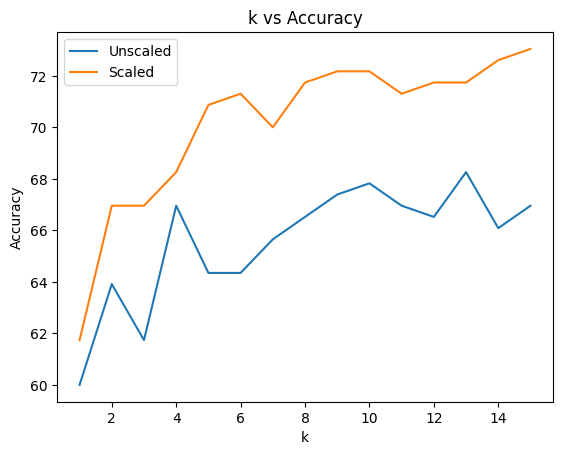

In [32]:
#Plot for accuracy
plt.figure()
plt.plot(k_values, accuracy_unscaled.values(), label="Unscaled")
plt.plot(k_values, accuracy_scaled.values(),  label="Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.legend()
plt.show()


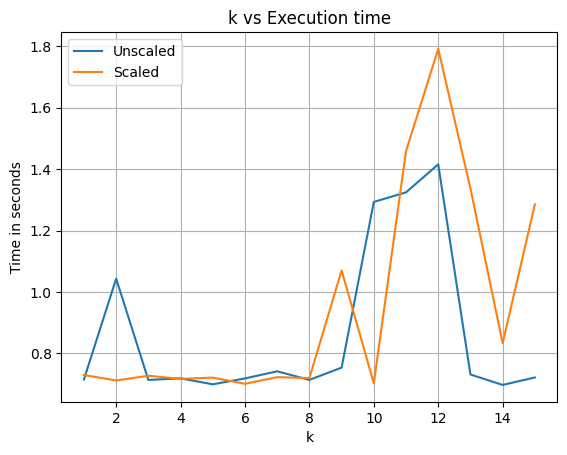

In [33]:
#plot for time
plt.figure()
plt.plot(k_values, time_unscaled.values(), label="Unscaled")
plt.plot(k_values, time_scaled.values(),  label="Scaled")
plt.xlabel("k")
plt.ylabel("Time in seconds")
plt.title("k vs Execution time")
plt.legend()
plt.grid()
plt.show()


3. Analyze and discuss

The choices of k affects the accuracy and computational cost as when the value of k is very small, the model becomes highly sensitive to the nearest neighbours which leads to overfitting causing high variance and low bias.
Similarly, when the value of k is very large, the model becomes overly generalized resulting in underfitting i.e high bias and low variance.


The optimal k based on my analysis is when k = 10 as the model showed the most accuracy when k value was 10

Problem -4

Using KNN for large datasets and high-dimensional data could be challenging the major challenge being the curse of dimensionality as the data points become increasingly far apart from each other causing the data space to become sparse. As a result, KNN struggles to identify truly similar neighbours leading to poor generalization.
Similarly, KNN is a lazy learning algorithm so for every prediction, distances must be computed between the test point and all training points. So for large datasets it results high computational cost, increased prediction time and poor scalability. KNN also stores the entire training dataset which may cause memory and storage overhead.






Strategies to improve efficiency of KNN:
1. Dimensionality reduction:
Reducing the number of features help mitigate the curse of dimensionality along with increasing the speed of distance computation.

2.Approximate Nearest Neighbour:
ANN helps us organize data so that similar points are grouped together, which allows us to search only the subset of the dataset. It returns the neighbours that are approximately nearest, not exact making the algorithm very fast.


3.Use efficient data structures:
Using data structures like KD-Tree (k-Dimensional Tree), Ball Tree organize data spatially, allowing large portions of search space to be pruned, thereby reducing computational cost